# Drought data generator

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

import ema_workbench
from ema_workbench import (Model, RealParameter, ScalarOutcome, MultiprocessingEvaluator, ema_logging)

In [20]:
from AMG_function import AMG_model_function


#Setting the stage
n_scenarios = 100000
seed=1
dataset_name = f"{n_scenarios} scenarios - seed {seed}"

ema_logging.log_to_stderr(ema_logging.INFO)

ZA_names = ["PP1", "PP2", "PP3", "Toluquilla", "Pozos"]

#instantiate the model
AMG_model = Model("AMGmodel", function = AMG_model_function)

#Levers

AMG_model.levers = []

low_flow =0
high_flow= 1.5
maximum_flows = {"chapala": 11.4, "calderon_lared":4.5, "pozos":4.8, "toluquilla":1.5}
AMG_model.uncertainties = [RealParameter('chapala_flow',low_flow,maximum_flows["chapala"]),
                           RealParameter('calderon_lared_flow',low_flow,maximum_flows["calderon_lared"]),
                           RealParameter('pozos_flow',low_flow,maximum_flows["pozos"]),
                           RealParameter('toluquilla_flow',low_flow,maximum_flows["toluquilla"])]


In [21]:
ema_logging.log_to_stderr(ema_logging.INFO)
random.seed(seed)
np.random.seed(seed)

with MultiprocessingEvaluator(AMG_model, n_processes=-1) as evaluator:
    scenarios_data = evaluator.perform_experiments(n_scenarios)

import seaborn as sns

main_scenarios_df = scenarios_data[0]

main_scenarios_df.head()

[MainProcess/INFO] pool started with 7 workers
[MainProcess/INFO] performing 100000 scenarios * 1 policies * 1 model(s) = 100000 experiments
100%|████████████████████████████████| 100000/100000 [01:15<00:00, 1329.89it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


,calderon_lared_flow,chapala_flow,pozos_flow,toluquilla_flow,scenario,policy,model
0,1.964716,11.361888,2.642800,0.047761,300000,None,AMGmodel
1,3.927513,4.532417,3.273371,0.048117,300001,None,AMGmodel
2,0.644275,7.595526,4.671480,1.291420,300002,None,AMGmodel
3,3.686981,5.022121,2.652037,0.699671,300003,None,AMGmodel
4,4.289477,3.910866,0.612484,0.176124,300004,None,AMGmodel


c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


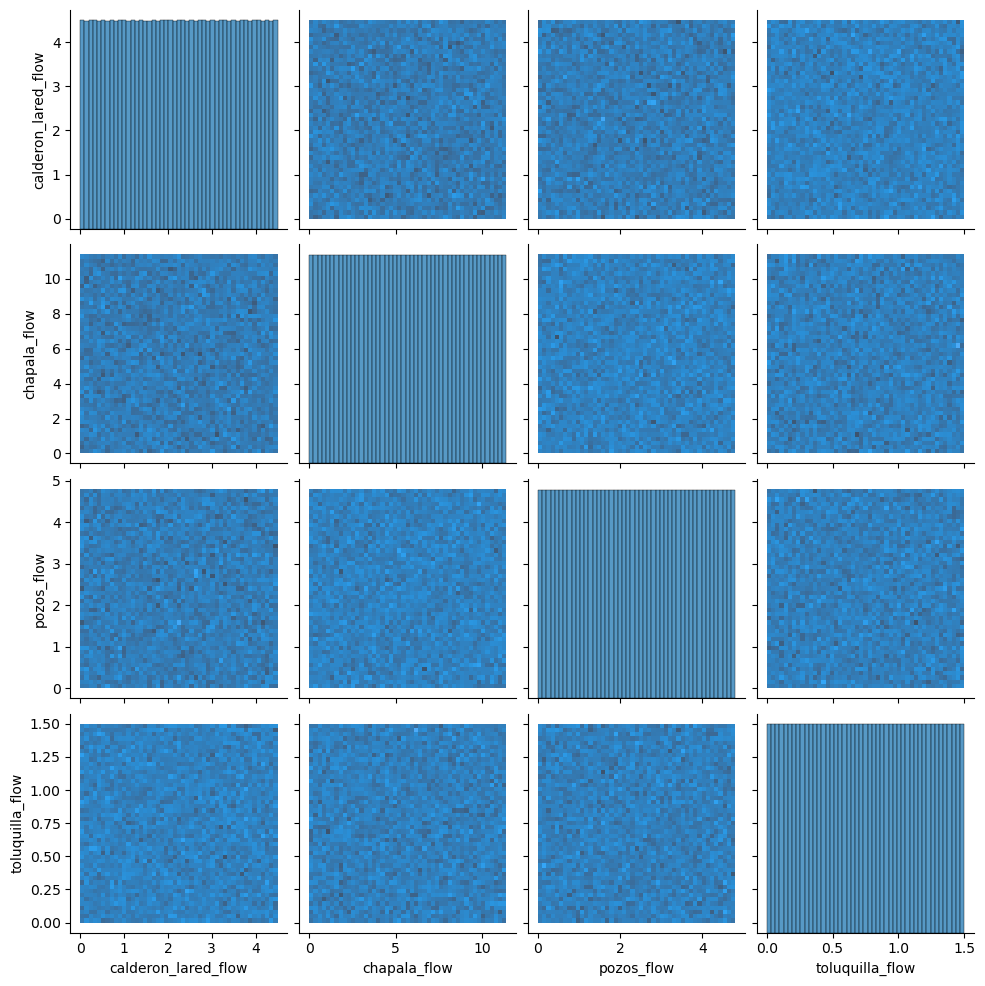

In [22]:
sns.pairplot(main_scenarios_df, kind="hist")

In [23]:
main_scenarios_df.to_csv(f"data/drought_scenarios_{n_scenarios} - seed{seed}.csv", index=False)

c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\ariel\anaconda3\envs\MBWSA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has change

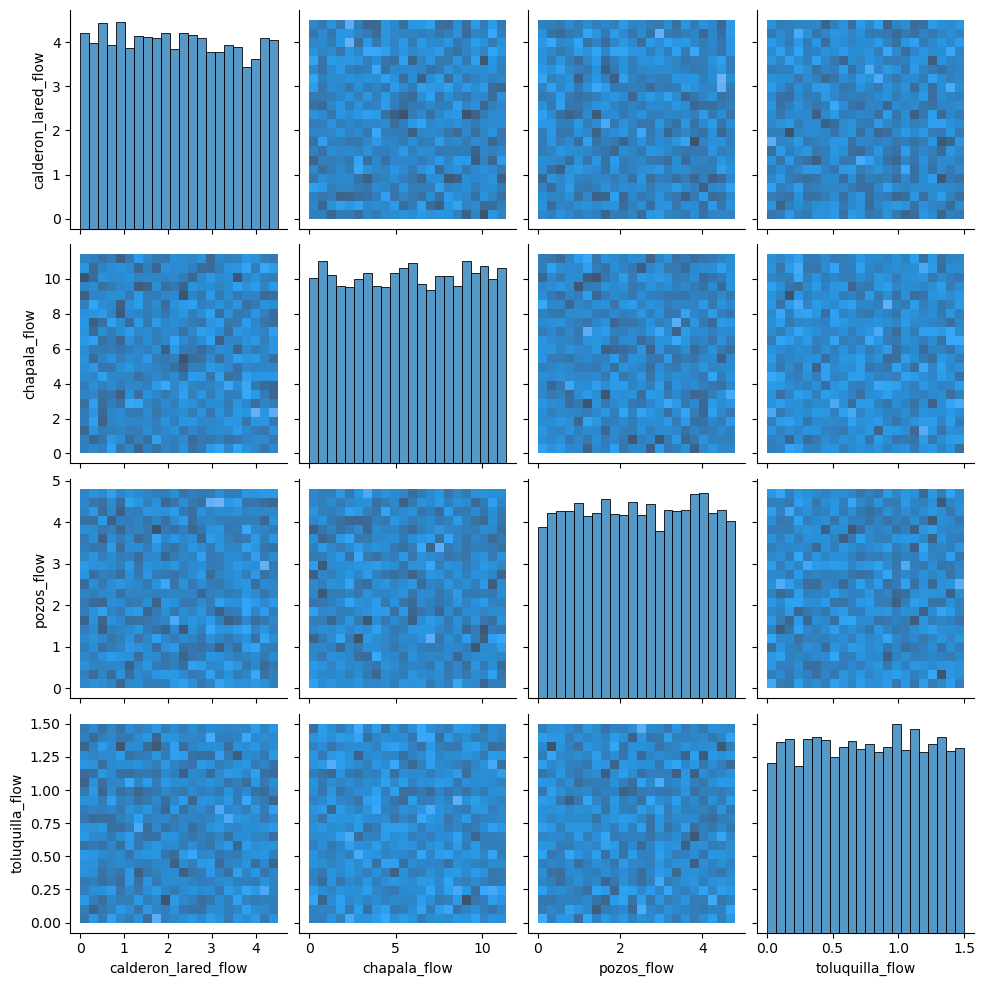

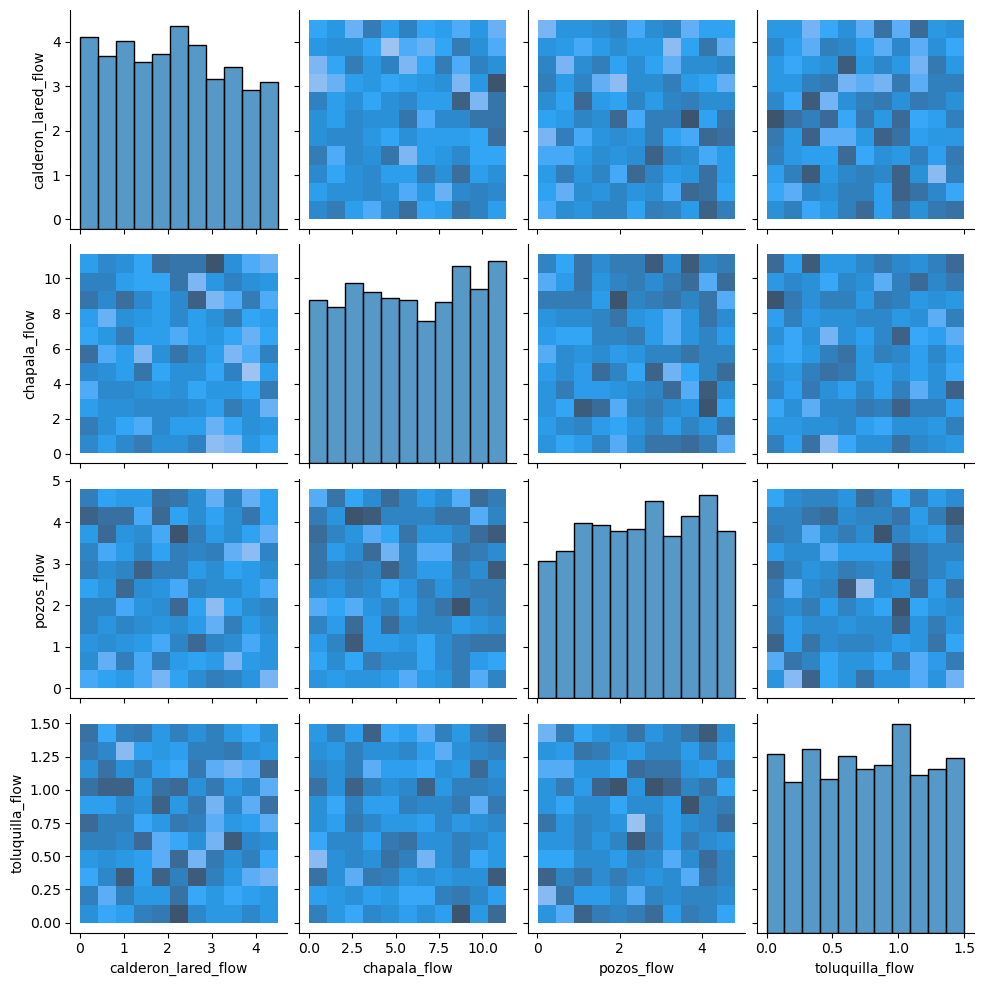

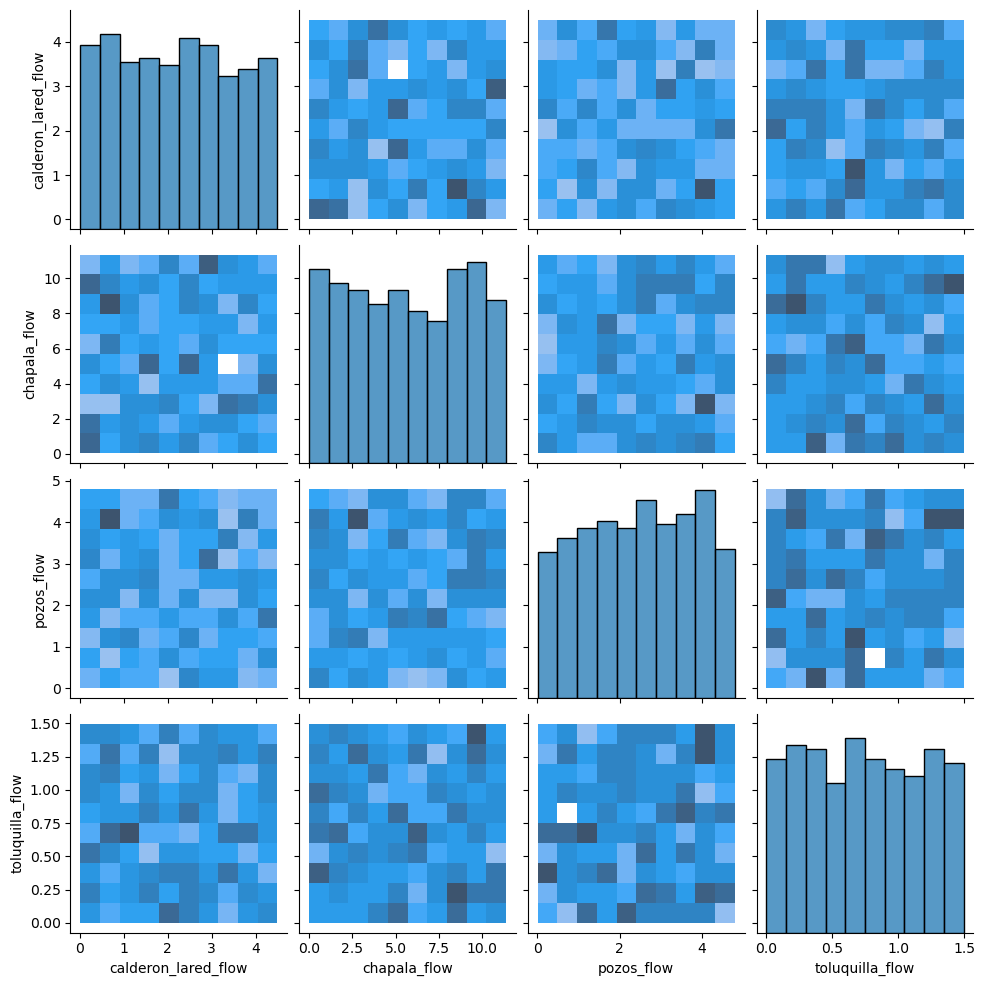

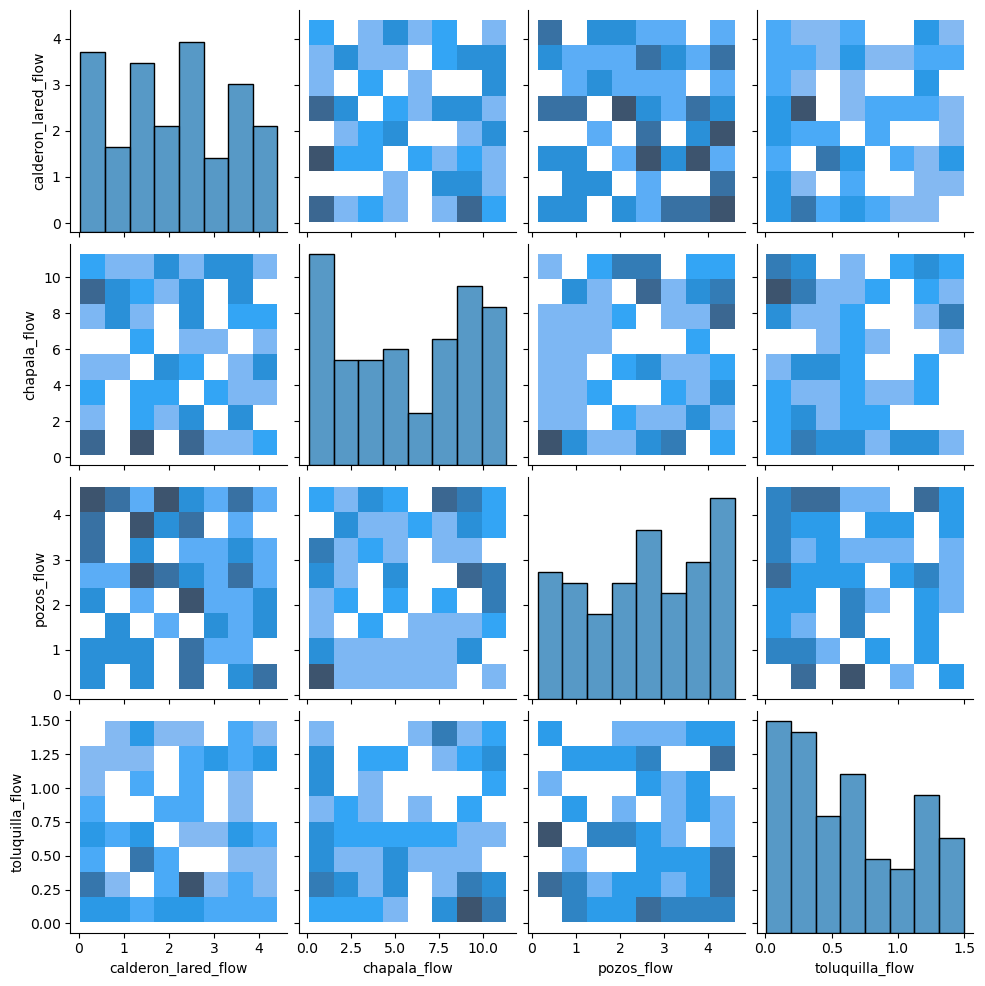

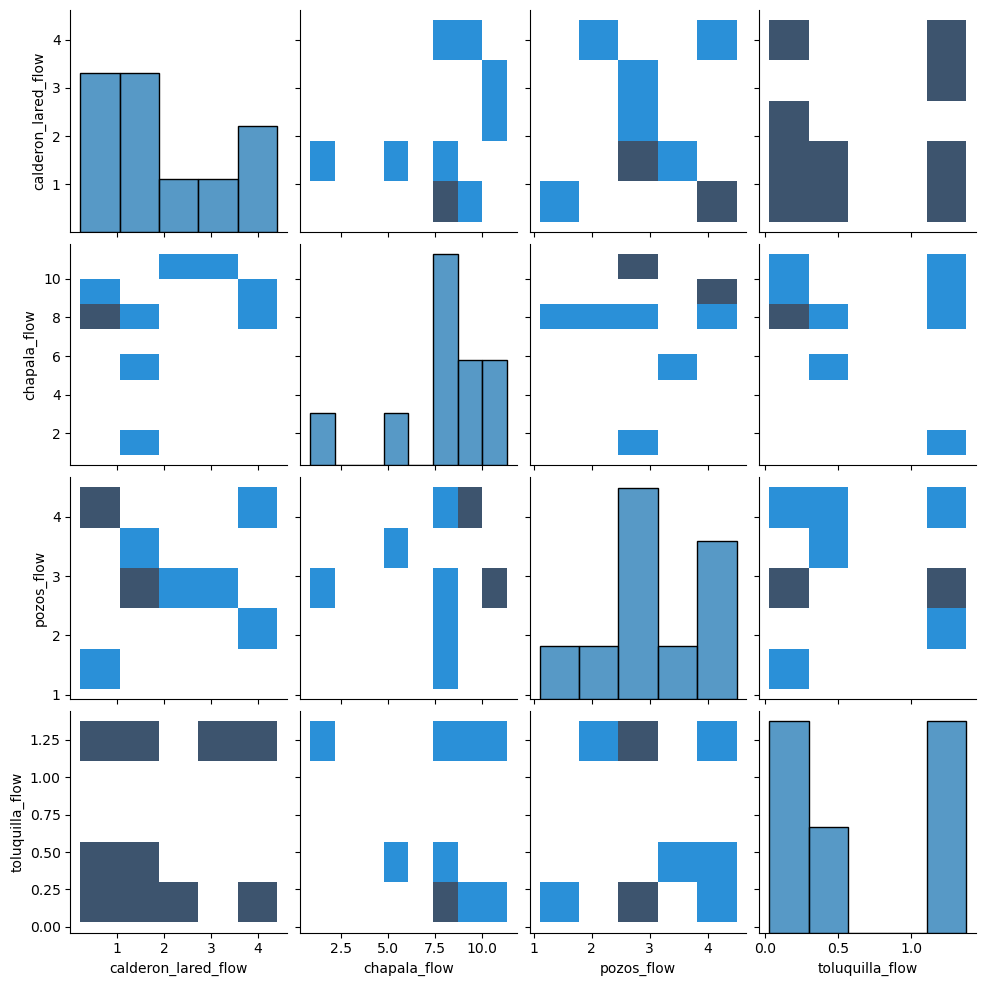

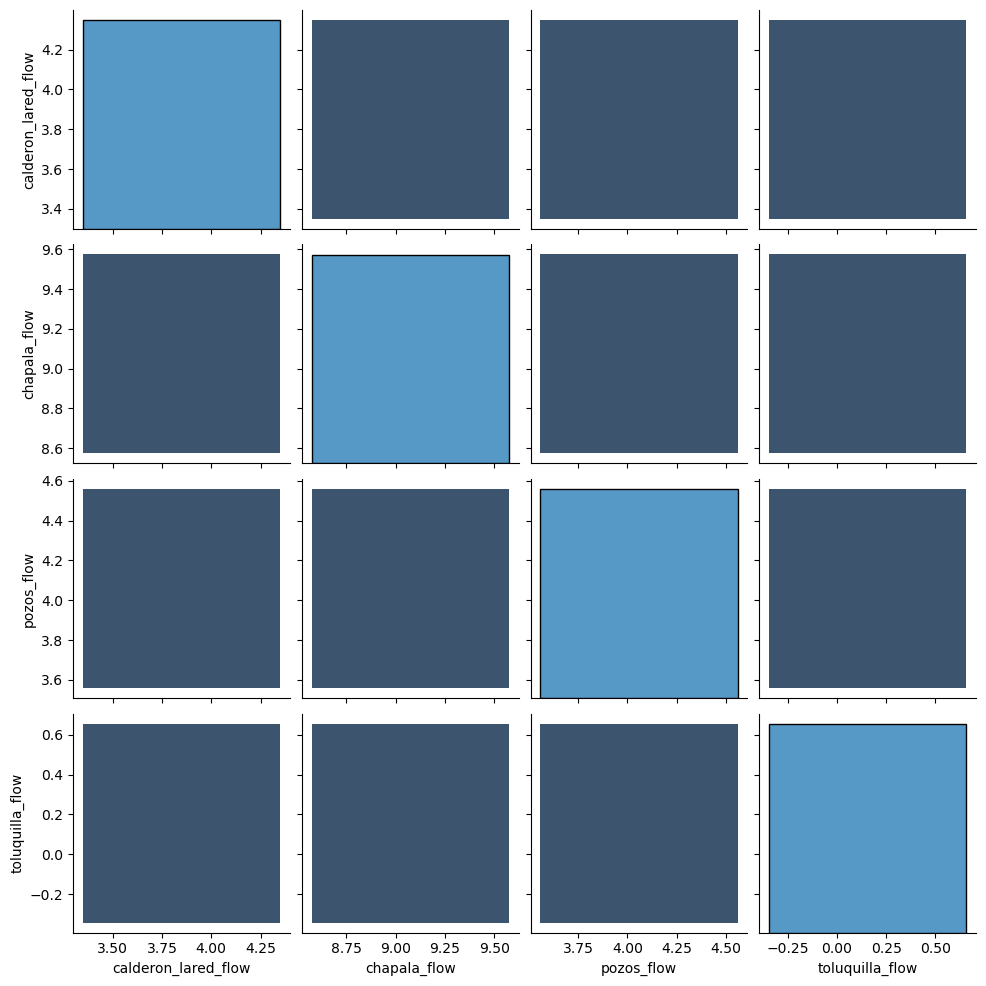

In [24]:
from ema_workbench import Samplers

samples_sizes = [10000, 1000, 500, 100, 10, 1]

for size in samples_sizes:
    n_rand = 0 #a counter to facilitate seed analysis
    sample_df = main_scenarios_df.sample(size,random_state=np.random.seed(seed+n_rand))
    sample_df.to_csv(f"data/drought_scenarios_{size} - seed{seed}.csv", index=False)
    sns.pairplot(sample_df, kind="hist")